Nama : Aji Sakti Saputra

NRP : 2C2230012

**Menganalisa pendapatan amazon berdasarkan category**

# Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import pyplot
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/amazon_sales_data 2025 (1).csv')
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Total Sales,0
Customer Name,0
Customer Location,0
Payment Method,0


In [ ]:
df['Status'].str.contains('Cancelled').sum(),
df['Status'].str.contains('Completed').sum(),
df['Status'].str.contains('Pending').sum()

np.int64(85)

In [ ]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [ ]:
revenue=df[df['Status'].str.contains('Completed')][['Order ID', 'Status','Total Sales','Category']]
revenue

,Order ID,Status,Total Sales,Category
6,ORD0007,Completed,600,Electronics
7,ORD0008,Completed,500,Electronics
8,ORD0009,Completed,60,Clothing
11,ORD0012,Completed,160,Clothing
14,ORD0015,Completed,600,Electronics
...,...,...,...,...
237,ORD0238,Completed,100,Electronics
238,ORD0239,Completed,750,Electronics
242,ORD0243,Completed,120,Footwear
243,ORD0244,Completed,2000,Electronics


#Query Sales berdasarkan status order

Total Sales dengan Status "Completed" per Kategori

In [ ]:
grup=revenue.groupby(['Category','Status'],as_index=False).agg({'Total Sales':'sum'}).sort_values('Total Sales',ascending=False)
grup

,Category,Status,Total Sales
2,Electronics,Completed,55900
4,Home Appliances,Completed,29400
3,Footwear,Completed,1620
1,Clothing,Completed,1400
0,Books,Completed,210


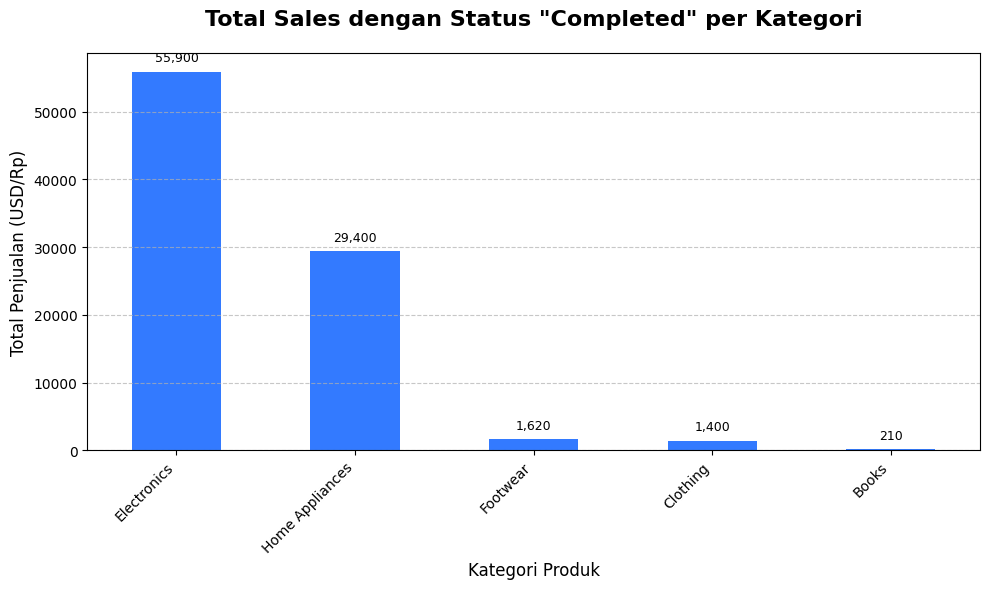

In [ ]:
# 1. Plotting Diagram Batang
ax = grup.plot(
    x='Category',
    y='Total Sales',
    kind='bar',
    figsize=(10, 6),           # Ukuran figure (lebar, tinggi)
    color='#337AFF',           # Warna batang (contoh warna biru cerah)
    legend=False               # Tidak perlu legenda karena hanya ada 1 seri data
)

# 2. Pengaturan Judul dan Label Sumbu
plt.title(
    'Total Sales dengan Status "Completed" per Kategori',
    fontsize=16,
    fontweight='bold',
    pad=20 # Jarak antara judul dan plot
)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Penjualan (USD/Rp)', fontsize=12)

# 3. Kustomisasi Label Sumbu X
# Rotasi label kategori agar mudah dibaca
plt.xticks(rotation=45, ha='right')

# 4. Menambahkan Nilai Data (Labels) di Atas Setiap Batang
# Iterasi melalui setiap batang dan tambahkan teks nilainya
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,}', # Format nilai dengan koma sebagai ribuan
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),       # Offset (pergeseran) teks dari batang
        textcoords='offset points',
        fontsize=9
    )

# 5. Menambahkan Garis Bantu (Grid) untuk Keterbacaan
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# 6. Tampilkan Plot
plt.tight_layout() # Penyesuaian agar semua elemen, termasuk label yang dirotasi, terlihat
plt.show()

In [ ]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


Total Sales dengan Status "Pending" per Kategori

In [ ]:
pending_status=df.loc[df['Status'].str.contains('Pending'),['Category','Status','Total Sales']]
pending_status

,Category,Status,Total Sales
1,Electronics,Pending,400
3,Footwear,Pending,180
4,Electronics,Pending,450
5,Clothing,Pending,20
10,Books,Pending,30
...,...,...,...
228,Footwear,Pending,180
229,Electronics,Pending,400
239,Electronics,Pending,150
240,Electronics,Pending,2000


In [ ]:
grup_pending=pending_status.groupby(['Category','Status'],as_index=False).agg({'Total Sales':sum}).sort_values('Total Sales',ascending=False)
grup_pending

/tmp/ipython-input-2264330001.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  grup_pending=pending_status.groupby(['Category','Status'],as_index=False).agg({'Total Sales':sum}).sort_values('Total Sales',ascending=False)


,Category,Status,Total Sales
2,Electronics,Pending,47400
4,Home Appliances,Pending,39600
3,Footwear,Pending,1620
1,Clothing,Pending,1020
0,Books,Pending,645


Total Sales dengan Status "Cancelled" per Kategori

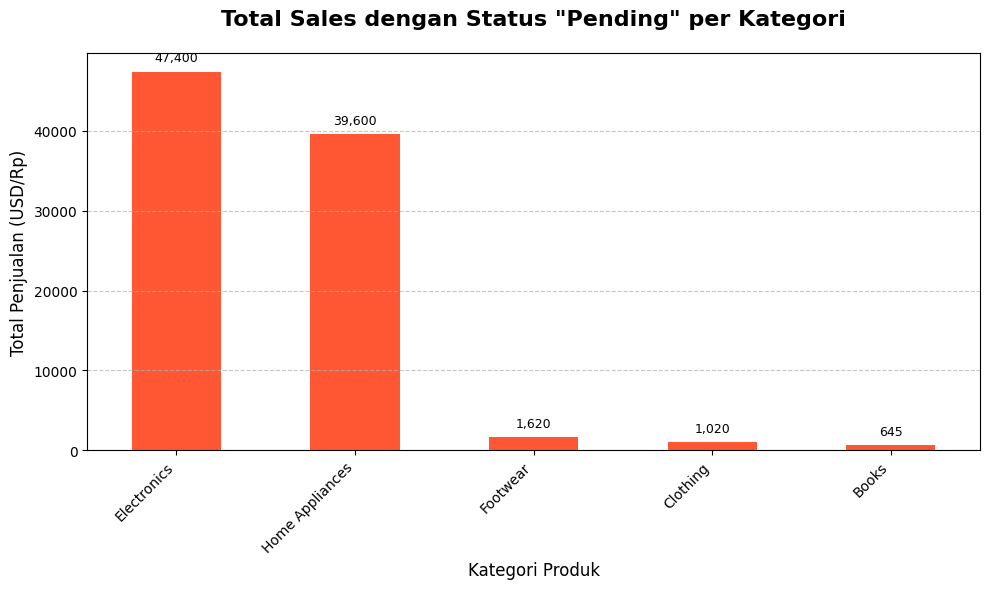

In [ ]:

# 1. Plotting Diagram Batang
# Gunakan metode plot() bawaan Pandas yang di-backend oleh Matplotlib.
ax = grup_pending.plot(
    x='Category',
    y='Total Sales',
    kind='bar',
    figsize=(10, 6),           # Ukuran figure (lebar, tinggi)
    color='#FF5733',           # Warna batang (contoh warna oranye)
    legend=False               # Tidak perlu legenda karena hanya ada 1 seri data
)

# 2. Pengaturan Judul dan Label Sumbu
plt.title(
    'Total Sales dengan Status "Pending" per Kategori',
    fontsize=16,
    fontweight='bold',
    pad=20 # Jarak antara judul dan plot
)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Penjualan (USD/Rp)', fontsize=12)

# 3. Kustomisasi Label Sumbu X
# Rotasi label kategori agar mudah dibaca
plt.xticks(rotation=45, ha='right')

# 4. Menambahkan Nilai Data (Labels) di Atas Setiap Batang
# Iterasi melalui setiap batang dan tambahkan teks nilainya
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,}', # Format nilai dengan koma sebagai ribuan
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),       # Offset (pergeseran) teks dari batang
        textcoords='offset points',
        fontsize=9
    )

# 5. Menambahkan Garis Bantu (Grid) untuk Keterbacaan
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# 6. Tampilkan Plot
plt.tight_layout() # Penyesuaian agar semua elemen, termasuk label yang dirotasi, terlihat
plt.show()

In [ ]:
df['Status'].value_counts()

,count
Status,
Completed,88
Pending,85
Cancelled,77


In [ ]:
cancalled_status=df.loc[df['Status'].str.contains('Cancelled'),['Category','Status','Total Sales']].groupby(['Category','Status'],as_index=False).agg({'Total Sales':sum}).sort_values('Total Sales',ascending=False)
cancalled_status

/tmp/ipython-input-3676196056.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cancalled_status=df.loc[df['Status'].str.contains('Cancelled'),['Category','Status','Total Sales']].groupby(['Category','Status'],as_index=False).agg({'Total Sales':sum}).sort_values('Total Sales',ascending=False)


,Category,Status,Total Sales
4,Home Appliances,Cancelled,36000
2,Electronics,Cancelled,26650
1,Clothing,Cancelled,1120
3,Footwear,Cancelled,1080
0,Books,Cancelled,180


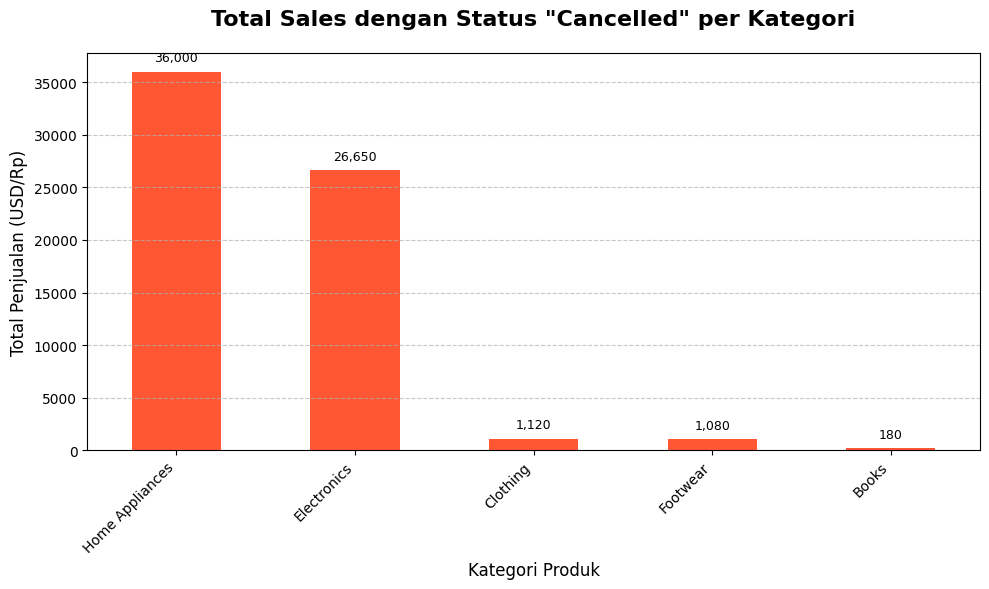

In [ ]:

# 1. Plotting Diagram Batang
# Gunakan metode plot() bawaan Pandas yang di-backend oleh Matplotlib.
ax = cancalled_status.plot(
    x='Category',
    y='Total Sales',
    kind='bar',
    figsize=(10, 6),           # Ukuran figure (lebar, tinggi)
    color='#FF5733',           # Warna batang (contoh warna oranye)
    legend=False               # Tidak perlu legenda karena hanya ada 1 seri data
)

# 2. Pengaturan Judul dan Label Sumbu
plt.title(
    'Total Sales dengan Status "Cancelled" per Kategori',
    fontsize=16,
    fontweight='bold',
    pad=20 # Jarak antara judul dan plot
)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Penjualan (USD/Rp)', fontsize=12)

# 3. Kustomisasi Label Sumbu X
# Rotasi label kategori agar mudah dibaca
plt.xticks(rotation=45, ha='right')

# 4. Menambahkan Nilai Data (Labels) di Atas Setiap Batang
# Iterasi melalui setiap batang dan tambahkan teks nilainya
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,}', # Format nilai dengan koma sebagai ribuan
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),       # Offset (pergeseran) teks dari batang
        textcoords='offset points',
        fontsize=9
    )

# 5. Menambahkan Garis Bantu (Grid) untuk Keterbacaan
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# 6. Tampilkan Plot
plt.tight_layout() # Penyesuaian agar semua elemen, termasuk label yang dirotasi, terlihat
plt.show()

In [ ]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


# Memfilter kolom untuk mencari sales berdasarkan category dan subcategory

In [ ]:
sales1=df.loc[:,['Product','Category','Quantity','Price','Total Sales','Status']]
sales1

,Product,Category,Quantity,Price,Total Sales,Status
0,Running Shoes,Footwear,3,60,180,Cancelled
1,Headphones,Electronics,4,100,400,Pending
2,Running Shoes,Footwear,2,60,120,Cancelled
3,Running Shoes,Footwear,3,60,180,Pending
4,Smartwatch,Electronics,3,150,450,Pending
...,...,...,...,...,...,...
245,T-Shirt,Clothing,2,20,40,Cancelled
246,Jeans,Clothing,1,40,40,Cancelled
247,T-Shirt,Clothing,2,20,40,Cancelled
248,Smartwatch,Electronics,3,150,450,Cancelled


In [ ]:
sales1.head().sort_values(by='Total Sales',ascending=False)

,Product,Category,Quantity,Price,Total Sales,Status
4,Smartwatch,Electronics,3,150,450,Pending
1,Headphones,Electronics,4,100,400,Pending
0,Running Shoes,Footwear,3,60,180,Cancelled
3,Running Shoes,Footwear,3,60,180,Pending
2,Running Shoes,Footwear,2,60,120,Cancelled


# Mencari kontribusi penjualan berdasarkan category dan subcategory, dengan membuat kolom baru yaitu Sales Contribution Percentage

In [ ]:
# 1. Hitung total penjualan keseluruhan
total_overall_sales = sales1['Total Sales'].sum()

# 2. Hitung kontribusi persentase
sales1['Sales_Contribution_%'] = (sales1['Total Sales'] / total_overall_sales) * 100

In [ ]:
sales1.head()

,Product,Category,Quantity,Price,Total Sales,Status,Sales_Contribution_%
0,Running Shoes,Footwear,3,60,180,Cancelled,0.073817
1,Headphones,Electronics,4,100,400,Pending,0.164039
2,Running Shoes,Footwear,2,60,120,Cancelled,0.049212
3,Running Shoes,Footwear,3,60,180,Pending,0.073817
4,Smartwatch,Electronics,3,150,450,Pending,0.184543


# 1. Sales by Subcategory : Electronics

In [ ]:
electronic_sales=sales1.loc[sales1['Category']=='Electronics',['Product','Category','Quantity','Price','Total Sales','Sales_Contribution_%','Status']].sort_values(by='Sales_Contribution_%',ascending=False)
electronic_sales

,Product,Category,Quantity,Price,Total Sales,Sales_Contribution_%,Status
61,Laptop,Electronics,5,800,4000,1.640386,Completed
119,Laptop,Electronics,5,800,4000,1.640386,Completed
167,Laptop,Electronics,5,800,4000,1.640386,Pending
230,Laptop,Electronics,5,800,4000,1.640386,Cancelled
90,Laptop,Electronics,4,800,3200,1.312309,Pending
...,...,...,...,...,...,...,...
39,Smartwatch,Electronics,1,150,150,0.061514,Pending
67,Headphones,Electronics,1,100,100,0.041010,Cancelled
27,Headphones,Electronics,1,100,100,0.041010,Completed
160,Headphones,Electronics,1,100,100,0.041010,Completed


In [ ]:
gruping_elec=electronic_sales.groupby(['Product','Status'],as_index=False)['Sales_Contribution_%'].sum().sort_values(by='Sales_Contribution_%',ascending=False)
gruping_elec

,Product,Status,Sales_Contribution_%
4,Laptop,Completed,10.498472
5,Laptop,Pending,9.514241
7,Smartphone,Completed,9.022125
8,Smartphone,Pending,6.971642
3,Laptop,Cancelled,3.936927
6,Smartphone,Cancelled,3.895917
10,Smartwatch,Completed,2.829666
11,Smartwatch,Pending,1.845435
9,Smartwatch,Cancelled,1.783920
0,Headphones,Cancelled,1.312309


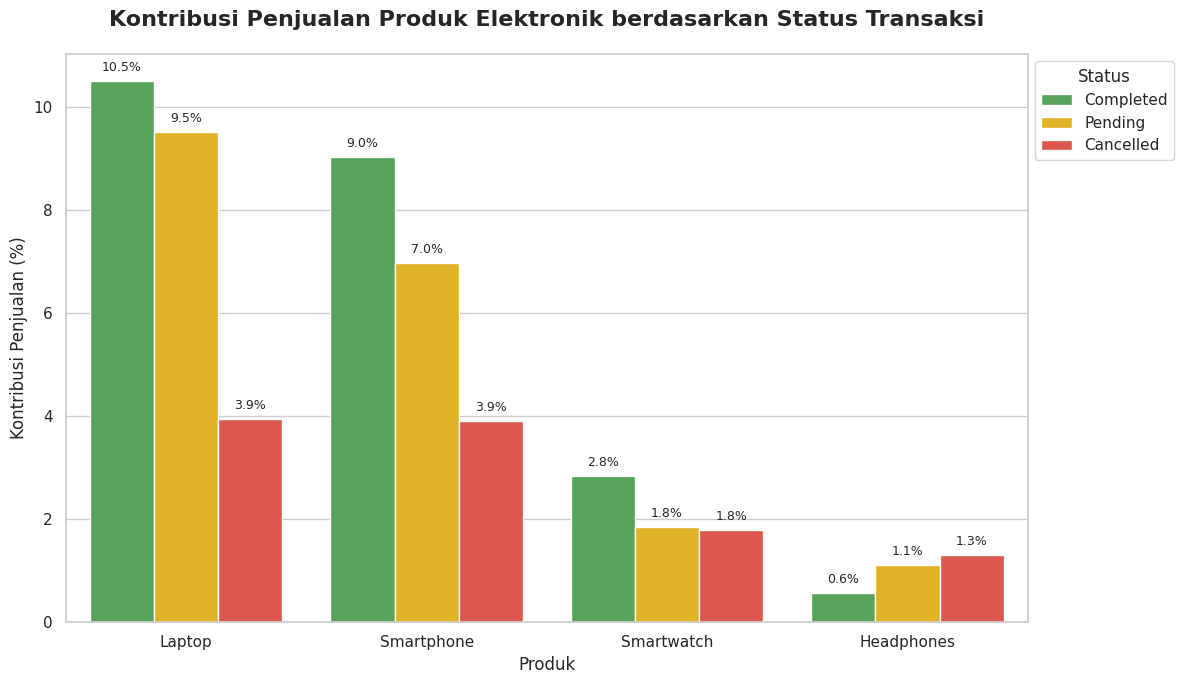

In [ ]:
# --- Sintaks Plotting ---

# Pengaturan gaya Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

# Membuat Diagram Batang Berkelompok
# x='Product' adalah kelompok utama, hue='Status' memecah batang
ax = sns.barplot(
    data=gruping_elec,
    x='Product',
    y='Sales_Contribution_%',
    hue='Status',
    palette={'Completed': '#4CAF50', 'Pending': '#FFC107', 'Cancelled': '#F44336'} # Warna custom
)

# 1. Pengaturan Judul dan Label
plt.title(
    'Kontribusi Penjualan Produk Elektronik berdasarkan Status Transaksi',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Produk', fontsize=12)
plt.ylabel('Kontribusi Penjualan (%)', fontsize=12)

# 2. Menambahkan Nilai Persentase (Data Labels)
for p in ax.patches:
    height = p.get_height()
    if height > 0.1: # Hindari label untuk batang yang sangat kecil
        ax.annotate(
            f'{height:.1f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=9
        )

# 3. Kustomisasi Sumbu X dan Legenda
plt.xticks(rotation=0)
ax.legend(title='Status', bbox_to_anchor=(1.0, 1), loc='upper left')

# Tampilkan Plot
plt.tight_layout()
plt.show()

Interpretasi:


*   Laptop & Smartphone adalah penyumbang penjualan terbesar, tetapi memiliki tingkat pembatalan (Cancelled) yang sama-sama tinggi (3.9%).
*   Headphones sangat bermasalah: Transaksi yang Dibatalkan (1.3%) jumlahnya jauh lebih besar daripada transaksi yang Berhasil (0.6%)



Rekomendasi :

*  Optimasi Halaman Produk, Tingkatkan deskripsi, gambar, dan testimonial untuk meningkatkan Conversion Rate (dari 0.6% menjadi lebih tinggi).
*   Analisis Ulasan & Return, Cek mengapa pelanggan membatalkan pesanan. Apakah karena kualitas, ulasan buruk, atau estimasi pengiriman yang terlalu lama?
*  Audit Proses Transaksi,  Periksa stok, harga, dan ketersediaan Headphones. Pastikan informasi di situs akurat agar tidak ada pembatalan karena kesalahan data.





# 2. Sales by Subcategory : Footwear

In [ ]:
footwear_sales=sales1.loc[sales1['Category']=='Footwear',['Product','Sales_Contribution_%','Status']].groupby(['Product','Status'],as_index=False)['Sales_Contribution_%'].sum().sort_values(by='Sales_Contribution_%',ascending=False)
footwear_sales

,Product,Status,Sales_Contribution_%
1,Running Shoes,Completed,0.664356
2,Running Shoes,Pending,0.664356
0,Running Shoes,Cancelled,0.442904


/tmp/ipython-input-2075780632.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


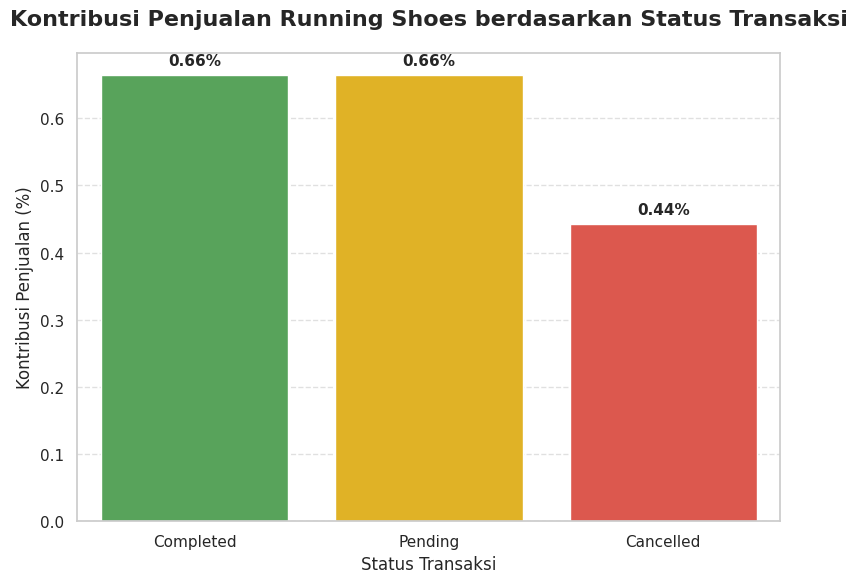

In [ ]:
# --- Sintaks Plotting ---

# Pengaturan gaya Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))

# Membuat Diagram Batang Vertikal
ax = sns.barplot(
    data=footwear_sales,
    x='Status', # Status di sumbu X
    y='Sales_Contribution_%', # Persentase di sumbu Y
    # Menggunakan warna custom yang mencerminkan status: Hijau (Completed), Kuning (Pending), Merah (Cancelled)
    palette={'Completed': '#4CAF50', 'Pending': '#FFC107', 'Cancelled': '#F44336'},
    order=['Completed', 'Pending', 'Cancelled'] # Memastikan urutan batang konsisten
)

# 1. Pengaturan Judul dan Label
plt.title(
    'Kontribusi Penjualan Running Shoes berdasarkan Status Transaksi',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Status Transaksi', fontsize=12)
plt.ylabel('Kontribusi Penjualan (%)', fontsize=12)

# 2. Menambahkan Nilai Persentase (Data Labels)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}%', # Format nilai dua desimal
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        xytext=(0, 5),        # Offset teks 5 poin ke atas
        textcoords='offset points',
        fontsize=11,
        fontweight='bold'
    )

# 3. Kustomisasi Grid
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Tampilkan Plot
plt.tight_layout()
plt.show()

interpretasi:

Rasio Masalah Tinggi: Persentase transaksi yang dibatalkan (0.44%) sangat signifikan dibandingkan dengan persentase yang berhasil diselesaikan (0.66%).



Potensi Besar: Kontribusi transaksi yang masih Pending (0.66%) sangat besar dan setara dengan yang sudah selesai. Jika sebagian besar transaksi Pending ini dapat diselesaikan, kontribusi penjualan Running Shoes bisa berlipat ganda.

💡 Rekomendasi Tindakan :

1. Tindak Lanjut Cepat (Follow-Up): Hubungi pelanggan yang transaksinya Pending sesegera mungkin (misalnya, via email/SMS) untuk memandu mereka menyelesaikan pembayaran atau mengonfirmasi ketersediaan barang.

2. Analisis Alasan Pembatalan: Selidiki mengapa banyak transaksi dibatalkan. Apakah karena masalah stok, gateway pembayaran eror, atau biaya pengiriman yang mengejutkan di akhir?

In [ ]:
df['Category'].value_counts()

,count
Category,
Electronics,118
Home Appliances,40
Clothing,40
Footwear,27
Books,25


# 3. Sales by Subcategory : Home Appliances

In [ ]:
Homeapp_sales=sales1.loc[sales1['Category']=='Home Appliances',['Product','Status','Sales_Contribution_%']].groupby(['Product','Status'],as_index=False)['Sales_Contribution_%'].sum().sort_values(by='Sales_Contribution_%',ascending=False)
Homeapp_sales

,Product,Status,Sales_Contribution_%
2,Refrigerator,Pending,12.795013
0,Refrigerator,Cancelled,9.842318
1,Refrigerator,Completed,9.350202
3,Washing Machine,Cancelled,4.921159
5,Washing Machine,Pending,3.444811
4,Washing Machine,Completed,2.706637


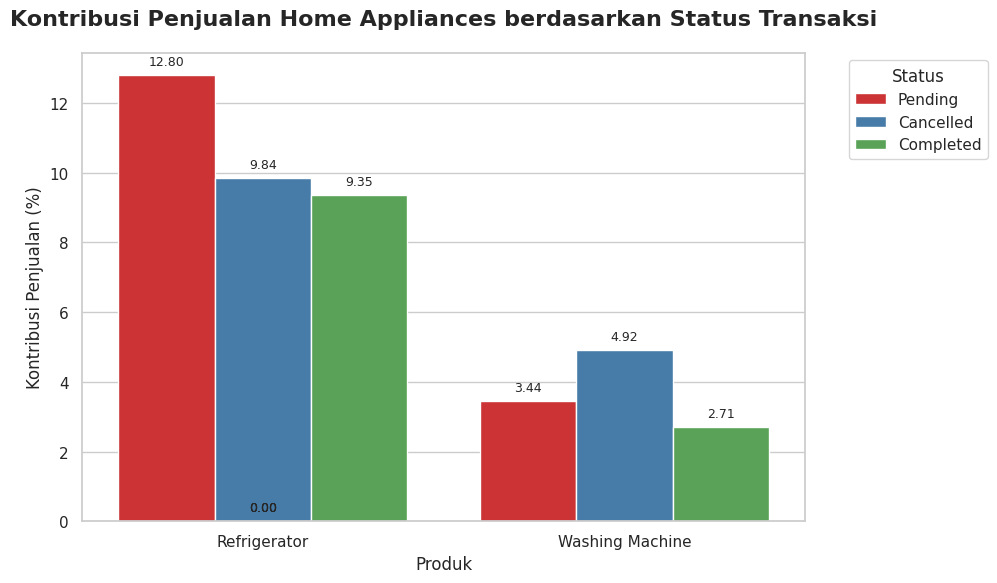

In [ ]:
# --- Sintaks Plotting ---

# Pengaturan gaya Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Membuat Diagram Batang Berkelompok
# x='Product' adalah kelompok utama, hue='Status' memecah batang menjadi sub-kelompok
ax = sns.barplot(
    data=Homeapp_sales,
    x='Product',
    y='Sales_Contribution_%',
    hue='Status',
    palette='Set1' # Palet warna yang jelas
)

# 1. Pengaturan Judul dan Label
plt.title(
    'Kontribusi Penjualan Home Appliances berdasarkan Status Transaksi',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Produk', fontsize=12)
plt.ylabel('Kontribusi Penjualan (%)', fontsize=12)

# 2. Menambahkan Nilai Persentase (Data Labels)
# Loop melalui setiap batang (patch) dan tambahkan label
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}', # Format nilai dua desimal
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0, 5),        # Offset teks 5 poin ke atas
        textcoords='offset points',
        fontsize=9
    )

# 3. Kustomisasi Sumbu X (Opsional, jika label tumpang tindih)
plt.xticks(rotation=0)

# 4. Pindahkan Legenda ke lokasi yang lebih baik
ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan Plot
plt.tight_layout()
plt.show()

Interpretasi:



Kulkas (Refrigerator) - Kontributor Utama & Potensi Besar

*   Pending (12.80%): Transaksi yang masih tertunda sangatlah tinggi, menjadi kontribusi tertinggi di seluruh grafik. Ini adalah potensi pendapatan terbesar.

*   Cancelled (9.84%): Tingkat pembatalan sangat tinggi, mendekati angka Completed.
*   Completed (9.35%): Kontribusi penjualan yang berhasil adalah yang terendah di antara statusnya sendiri, menunjukkan efisiensi penyelesaian yang buruk.


Mesin Cuci (Washing Machine) - Risiko Pembatalan Tinggi


*   Cancelled (4.92%): Kontribusi pembatalan adalah yang tertinggi untuk produk ini.

*  Completed (2.71%): Kontribusi penyelesaian transaksi berhasil adalah yang terendah
*   Pending (3.44%): Angka Pending berada di tengah-tengah.



Rekomendasi:

Audit Logistik:
Selidiki apakah pembatalan disebabkan oleh:
1. Waktu pengiriman terlalu lama.
2. Biaya pengiriman/instalasi tidak terduga.
3. Masalah stok saat konfirmasi.

dengan tujuan untuk Mengurangi kerugian penjualan yang mahal (produk Home Appliances biasanya bernilai tinggi).

#4. Sales by Subcategory : Clothing

In [ ]:
clothing_sales=sales1.loc[sales1['Category']=='Clothing',['Product','Sales_Contribution_%','Status']].groupby(['Status','Product'],as_index=False)['Sales_Contribution_%'].sum().sort_values(by='Sales_Contribution_%',ascending=False)
clothing_sales

,Status,Product,Sales_Contribution_%
0,Cancelled,Jeans,0.393693
2,Completed,Jeans,0.344481
4,Pending,Jeans,0.278866
3,Completed,T-Shirt,0.229654
5,Pending,T-Shirt,0.139433
1,Cancelled,T-Shirt,0.065615


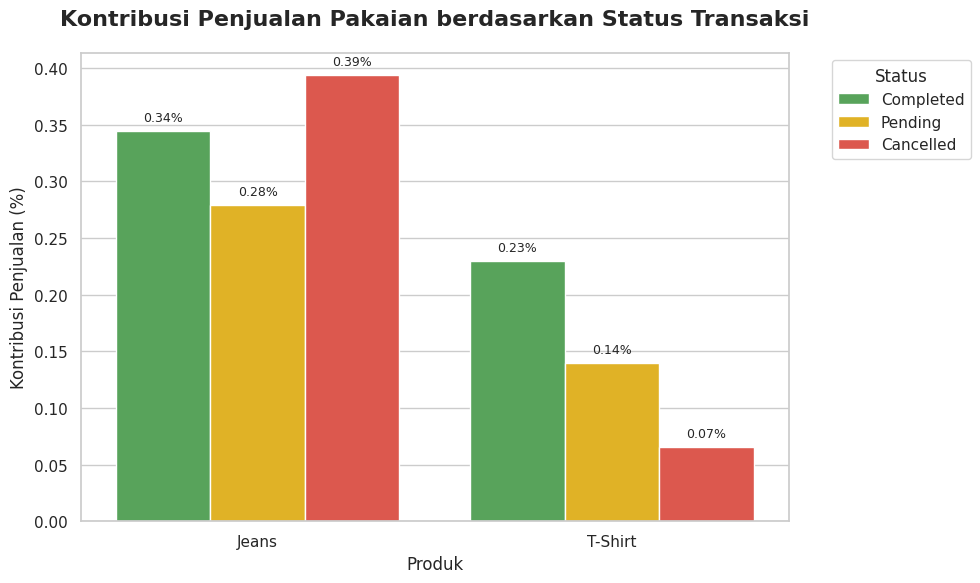

In [ ]:
# --- Sintaks Plotting ---

# Pengaturan gaya Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Membuat Diagram Batang Berkelompok
# x='Product' sebagai kelompok utama, hue='Status' memecah batang
ax = sns.barplot(
    data=clothing_sales,
    x='Product',
    y='Sales_Contribution_%',
    hue='Status',
    # Menggunakan warna custom yang mencerminkan status: Hijau, Kuning, Merah
    palette={'Completed': '#4CAF50', 'Pending': '#FFC107', 'Cancelled': '#F44336'},
    hue_order=['Completed', 'Pending', 'Cancelled'] # Memastikan urutan legenda status
)

# 1. Pengaturan Judul dan Label
plt.title(
    'Kontribusi Penjualan Pakaian berdasarkan Status Transaksi',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Produk', fontsize=12)
plt.ylabel('Kontribusi Penjualan (%)', fontsize=12)

# 2. Menambahkan Nilai Persentase (Data Labels)
for p in ax.patches:
    height = p.get_height()
    if height > 0.05: # Hindari label untuk batang yang sangat kecil
        ax.annotate(
            f'{height:.2f}%',
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='bottom',
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=9
        )

# 3. Kustomisasi Legenda
ax.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan Plot
plt.tight_layout()
plt.show()

Interpretasi:


*   Jeans: Ini adalah masalah terbesar. Jumlah transaksi yang Dibatalkan (0.39%) adalah yang tertinggi dan lebih besar daripada transaksi yang Berhasil (Completed: 0.34%).
*   T-Shirt: Ini adalah produk yang paling stabil. Transaksi Berhasil (Completed: 0.23%) adalah yang tertinggi, dan tingkat pembatalannya (Cancelled: 0.07%) adalah yang paling rendah.


Rekomendasi:

Audit Kualitas dan Ukuran

Lakukan A/B testing pada halaman produk dengan:
 1. Panduan ukuran (size chart) yang lebih rinci dan akurat (termasuk stretch).
 2. Video atau foto model mengenakan Jeans dari berbagai sudut untuk mengatasi keraguan fitting.

 Dorong Pembayaran Cepat
 1. Kirimkan pengingat (notifikasi/email) dalam 1 jam pertama untuk menyelesaikan pembayaran. Cek apakah ada masalah pada payment gateway spesifik untuk produk ini.

# 5. Sales Subcategory : Books

In [ ]:
books_sales=sales1.loc[sales1['Category']=='Books',['Product','Sales_Contribution_%','Status']].groupby(['Product','Status'],as_index=False)['Sales_Contribution_%'].sum().sort_values(by='Sales_Contribution_%',ascending=False)
books_sales

,Product,Status,Sales_Contribution_%
2,Book,Pending,0.264512
1,Book,Completed,0.086120
0,Book,Cancelled,0.073817


/tmp/ipython-input-2614350575.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


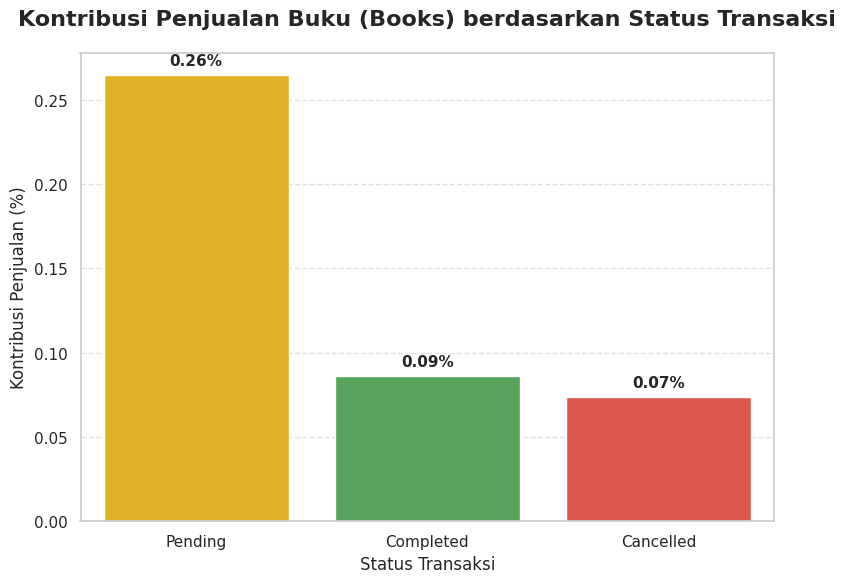

In [ ]:
# --- Sintaks Plotting ---

# Pengaturan gaya Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))

# Membuat Diagram Batang Vertikal
# Urutan Status disesuaikan untuk konsistensi visual
status_order = ['Pending', 'Completed', 'Cancelled']
ax = sns.barplot(
    data=books_sales,
    x='Status', # Status di sumbu X
    y='Sales_Contribution_%', # Persentase di sumbu Y
    # Menggunakan warna custom yang mencerminkan status
    palette={'Completed': '#4CAF50', 'Pending': '#FFC107', 'Cancelled': '#F44336'},
    order=status_order
)

# 1. Pengaturan Judul dan Label
plt.title(
    'Kontribusi Penjualan Buku (Books) berdasarkan Status Transaksi',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Status Transaksi', fontsize=12)
plt.ylabel('Kontribusi Penjualan (%)', fontsize=12)

# 2. Menambahkan Nilai Persentase (Data Labels)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}%', # Format nilai dua desimal
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        xytext=(0, 5),        # Offset teks 5 poin ke atas
        textcoords='offset points',
        fontsize=11,
        fontweight='bold'
    )

# 3. Kustomisasi Grid
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Tampilkan Plot
plt.tight_layout()
plt.show()

Interpretasi:

1. Pending (0.26%): Transaksi yang masih tertunda sangatlah dominan. Angka hampir tiga kali lipat dari transaksi yang sudah berhasil diselesaikan.

2. Completed (0.09%): Kontribusi penjualan yang berhasil sangat kecil.

3. Cancelled (0.07%): Tingkat pembatalan relatif rendah, hampir sama dengan transaksi yang berhasil.

Rekomendasi:

Cek dan Selesaikan Pembayaran:

1. Kirimkan pengingat instan (SMS/Email/Notifikasi) yang berisi tautan langsung untuk menyelesaikan pembayaran.
 2. Cek sistem: Apakah ada error pada payment gateway yang umum terjadi pada transaksi buku?

# **Kesimpulan  Akhir:**

Kesimpulan ini berfokus pada efisiensi penjualan (Completed), potensi pendapatan (Pending), dan kerugian (Cancelled) di seluruh kategori produk.

1. Kategori dengan Kontribusi Penjualan Completed Terbesar
Kategori Elektronik (Laptop & Smartphone) dan Peralatan Rumah Tangga (Kulkas) adalah revenue driver utama, menyumbang mayoritas penjualan yang berhasil (Completed).
2. Kategori dengan Potensi Pendapatan Terbesar (Pending)
Kategori Peralatan Rumah Tangga (Kulkas) dan Buku memiliki rasio Pending vs Completed yang paling mengkhawatirkan (masing-masing 1.37 dan 2.89).

*  Kulkas: Potensi besar yang bernilai tinggi (12.80% Pending).
*   Buku: Potensi konversi yang paling terhambat (0.26% Pending namun hanya 0.09% Completed).

3. Kategori dengan Risiko Kerugian Tertinggi (Cancelled)
*   Produk Paling Bermasalah: Headphones dan Jeans adalah dua produk di mana transaksi yang dibatalkan lebih banyak daripada yang diselesaikan. Ini menunjukkan masalah fundamental pada produk, deskripsi, atau logistik.
*   Kerugian Nilai Tertinggi: Kulkas dan Laptop/Smartphone memiliki persentase pembatalan yang tinggi dalam nilai absolut, yang berarti kerugian finansial yang besar karena harga produknya yang mahal.


**Rekomendasi:**

🎯 Rekomendasi Prioritas Aksi

*   Prioritas 1: Segera Atasi Pending Kulkas & Buku: Lakukan follow-up instan untuk mengubah potensi pendapatan (Kulkas) dan memperbaiki proses checkout yang gagal (Buku).
*   Prioritas 2: Audit Produk Cancelled: Selidiki masalah pada Headphones dan Jeans untuk menghentikan kerugian di mana pembatalan melebihi penjualan.


*   Prioritas 3: Lindungi Revenue Drivers: Cek logistik dan customer service untuk produk berharga tinggi (Laptop, Smartphone, Kulkas) untuk menurunkan tingkat pembatalan yang tinggi (sekitar 3.9% hingga 9.84%).


# (Eksploration)


In [ ]:

sales1.head()

,Product,Category,Quantity,Price,Total Sales,Status,Sales_Contribution_%
0,Running Shoes,Footwear,3,60,180,Cancelled,0.073817
1,Headphones,Electronics,4,100,400,Pending,0.164039
2,Running Shoes,Footwear,2,60,120,Cancelled,0.049212
3,Running Shoes,Footwear,3,60,180,Pending,0.073817
4,Smartwatch,Electronics,3,150,450,Pending,0.184543


CATEGORY ELECTRONICS

In [ ]:
kategory_sales=sales1.loc[sales1['Category']=='Electronics',['Product','Sales_Contribution_%','Status','Category']].groupby(['Category','Status'],as_index=False)['Sales_Contribution_%'].sum().sort_values(by='Sales_Contribution_%',ascending=False)
kategory_sales

,Category,Status,Sales_Contribution_%
1,Electronics,Completed,22.924399
2,Electronics,Pending,19.438578
0,Electronics,Cancelled,10.929074


/tmp/ipython-input-567850210.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


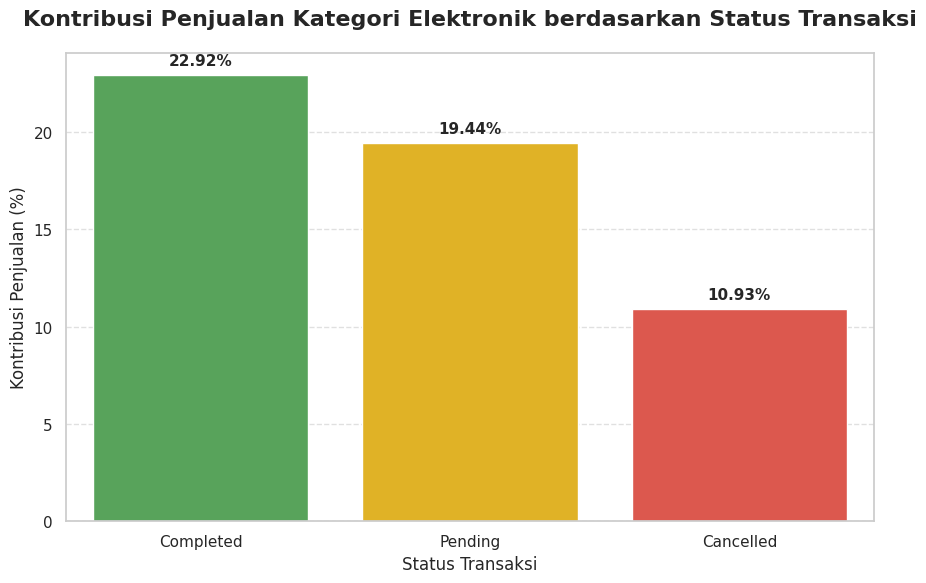

In [ ]:
# --- Sintaks Plotting ---

# Pengaturan gaya Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 6))

# Membuat Diagram Batang Vertikal
ax = sns.barplot(
    data=kategory_sales,
    x='Status', # Status di sumbu X
    y='Sales_Contribution_%', # Persentase di sumbu Y
    # Menggunakan warna custom yang mencerminkan status
    palette={'Completed': '#4CAF50', 'Pending': '#FFC107', 'Cancelled': '#F44336'},
    order=['Completed', 'Pending', 'Cancelled'] # Memastikan urutan batang konsisten
)

# 1. Pengaturan Judul dan Label
plt.title(
    'Kontribusi Penjualan Kategori Elektronik berdasarkan Status Transaksi',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Status Transaksi', fontsize=12)
plt.ylabel('Kontribusi Penjualan (%)', fontsize=12)

# 2. Menambahkan Nilai Persentase (Data Labels)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}%', # Format nilai dua desimal
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        xytext=(0, 5),        # Offset teks 5 poin ke atas
        textcoords='offset points',
        fontsize=11,
        fontweight='bold'
    )

# 3. Kustomisasi Grid
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Tampilkan Plot
plt.tight_layout()
plt.show()

In [ ]:
sales1.head()

,Product,Category,Quantity,Price,Total Sales,Status,Sales_Contribution_%
0,Running Shoes,Footwear,3,60,180,Cancelled,0.073817
1,Headphones,Electronics,4,100,400,Pending,0.164039
2,Running Shoes,Footwear,2,60,120,Cancelled,0.049212
3,Running Shoes,Footwear,3,60,180,Pending,0.073817
4,Smartwatch,Electronics,3,150,450,Pending,0.184543


CATEGORY FOOTWEAR

In [ ]:
kategori_salesfoorwear=sales1.loc[sales1['Category']=='Footwear',['Category','Status','Sales_Contribution_%']].groupby(['Category','Status'],as_index=False)['Sales_Contribution_%'].sum().sort_values(by='Sales_Contribution_%',ascending=False)
kategori_salesfoorwear

,Category,Status,Sales_Contribution_%
1,Footwear,Completed,0.664356
2,Footwear,Pending,0.664356
0,Footwear,Cancelled,0.442904


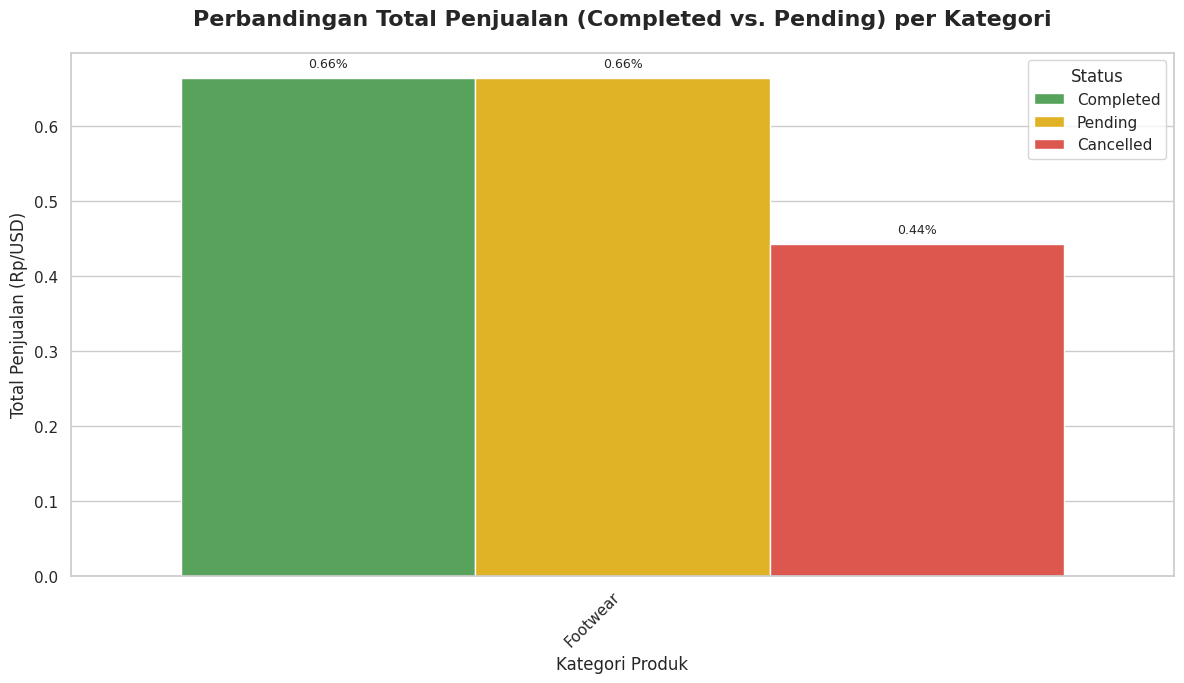

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# Membuat Diagram Batang Berkelompok
ax = sns.barplot(
    data=kategori_salesfoorwear,
    x='Category',
    y='Sales_Contribution_%',
    hue='Status',
    # Menggunakan warna custom yang membedakan Completed (Hijau), Pending (Kuning), dan Cancelled (Merah)
    palette={'Completed': '#4CAF50', 'Pending': '#FFC107', 'Cancelled': '#F44336'},
)

# 3. Pengaturan Judul dan Label
plt.title(
    'Perbandingan Total Penjualan (Completed vs. Pending) per Kategori',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Kategori Produk', fontsize=12)
plt.ylabel('Total Penjualan (Rp/USD)', fontsize=12)

# Rotasi label X dan Legenda
plt.xticks(rotation=45, ha='right')
ax.legend(title='Status', loc='upper right')

# 4. Menambahkan Nilai Data (Labels)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height:,.2f}%', # Format dengan 2 desimal, dengan pemisah ribuan dan simbol %
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=9
        )

plt.tight_layout()
plt.show()

CATEGORY HOME APPLIANCE

In [ ]:
Home_appliances=sales1.loc[sales1['Category']=='Home Appliances',['Category','Status','Sales_Contribution_%']].groupby(['Category','Status'],as_index=False)['Sales_Contribution_%'].sum().sort_values(by='Sales_Contribution_%',ascending=False)
Home_appliances

,Category,Status,Sales_Contribution_%
2,Home Appliances,Pending,16.239824
0,Home Appliances,Cancelled,14.763477
1,Home Appliances,Completed,12.056839


/tmp/ipython-input-1456696920.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


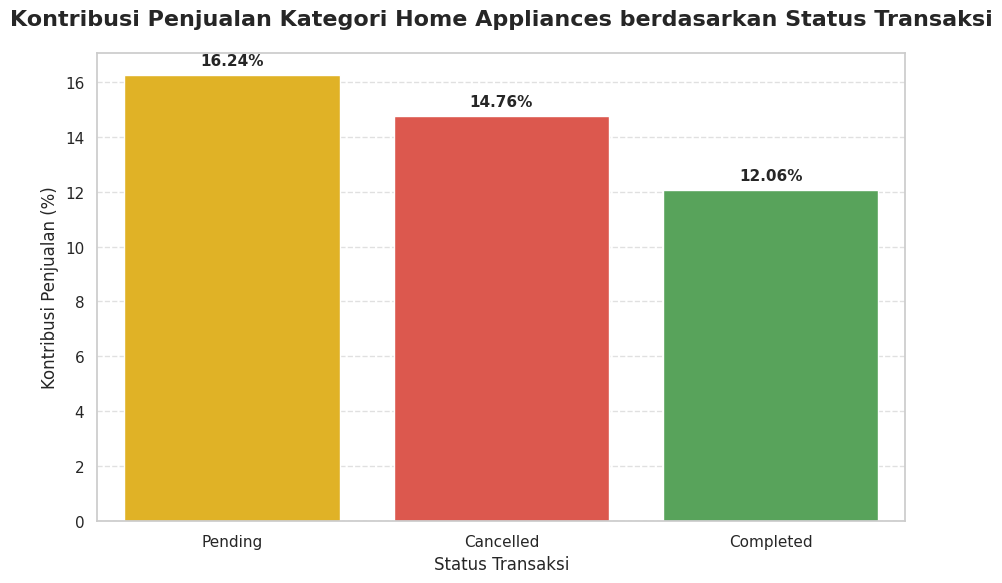

In [ ]:
# --- Sintaks Plotting ---

# Pengaturan gaya Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 6))

# Membuat Diagram Batang Vertikal
ax = sns.barplot(
    data=Home_appliances,
    x='Status',
    y='Sales_Contribution_%',
    # Menggunakan warna custom yang mencerminkan status
    palette={'Pending': '#FFC107', 'Cancelled': '#F44336', 'Completed': '#4CAF50'},
    order=['Pending', 'Cancelled', 'Completed'] # Memastikan urutan batang konsisten
)

# 1. Pengaturan Judul dan Label
plt.title(
    'Kontribusi Penjualan Kategori Home Appliances berdasarkan Status Transaksi',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Status Transaksi', fontsize=12)
plt.ylabel('Kontribusi Penjualan (%)', fontsize=12)

# 2. Menambahkan Nilai Persentase (Data Labels)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}%', # Format nilai dua desimal
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        xytext=(0, 5),        # Offset teks 5 poin ke atas
        textcoords='offset points',
        fontsize=11,
        fontweight='bold'
    )

# 3. Kustomisasi Grid
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Tampilkan Plot
plt.tight_layout()
plt.show()

In [ ]:
sales1['Category'].value_counts()

,count
Category,
Electronics,118
Home Appliances,40
Clothing,40
Footwear,27
Books,25


CATEGORY CLOTHING

In [ ]:
clothing_saless=sales1.loc[sales1['Category']=='Clothing',['Category','Status','Sales_Contribution_%']].groupby(['Category','Status'],as_index=False)['Sales_Contribution_%'].sum().sort_values(by='Sales_Contribution_%',ascending=False)
clothing_saless


,Category,Status,Sales_Contribution_%
1,Clothing,Completed,0.574135
0,Clothing,Cancelled,0.459308
2,Clothing,Pending,0.418299


/tmp/ipython-input-942187822.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


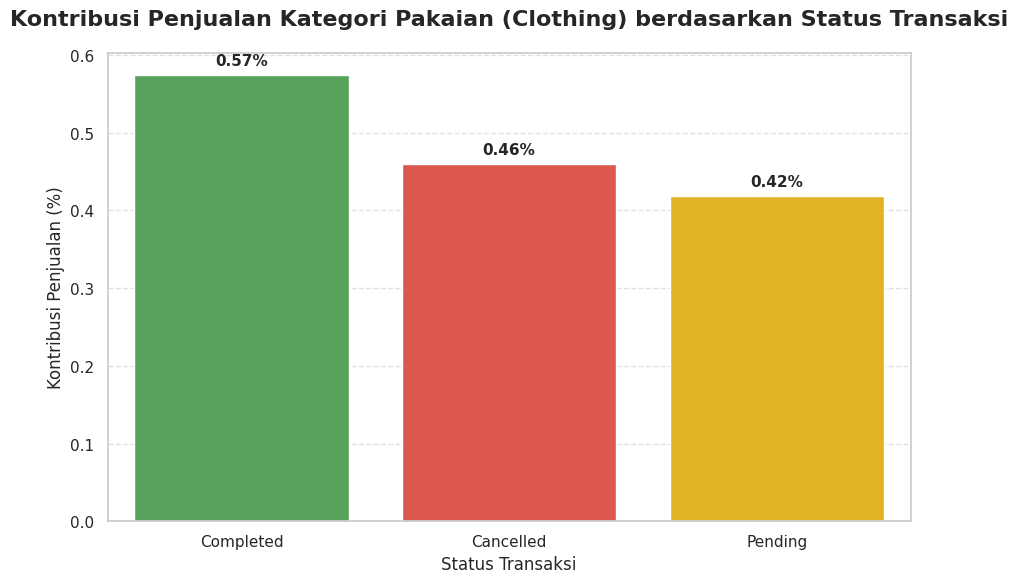

In [ ]:
# --- Sintaks Plotting ---

# Pengaturan gaya Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(9, 6))

# Membuat Diagram Batang Vertikal
ax = sns.barplot(
    data=clothing_saless,
    x='Status',
    y='Sales_Contribution_%',
    # Menggunakan warna custom yang mencerminkan status
    palette={'Completed': '#4CAF50', 'Cancelled': '#F44336', 'Pending': '#FFC107'},
    order=['Completed', 'Cancelled', 'Pending'] # Memastikan urutan batang konsisten
)

# 1. Pengaturan Judul dan Label
plt.title(
    'Kontribusi Penjualan Kategori Pakaian (Clothing) berdasarkan Status Transaksi',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel('Status Transaksi', fontsize=12)
plt.ylabel('Kontribusi Penjualan (%)', fontsize=12)

# 2. Menambahkan Nilai Persentase (Data Labels)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:.2f}%', # Format nilai dua desimal
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        xytext=(0, 5),        # Offset teks 5 poin ke atas
        textcoords='offset points',
        fontsize=11,
        fontweight='bold'
    )

# 3. Kustomisasi Grid
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)

# Tampilkan Plot
plt.tight_layout()
plt.show()

CATEGORY BOOKS

In [ ]:
books_sales=sales1.loc[sales1['Category']=='Books',['Category','Status','Sales_Contribution_%']].groupby(['Category','Status'],as_index=False)['Sales_Contribution_%'].sum().sort_values(by='Sales_Contribution_%',ascending=False)
books_sales

,Category,Status,Sales_Contribution_%
2,Books,Pending,0.264512
1,Books,Completed,0.086120
0,Books,Cancelled,0.073817


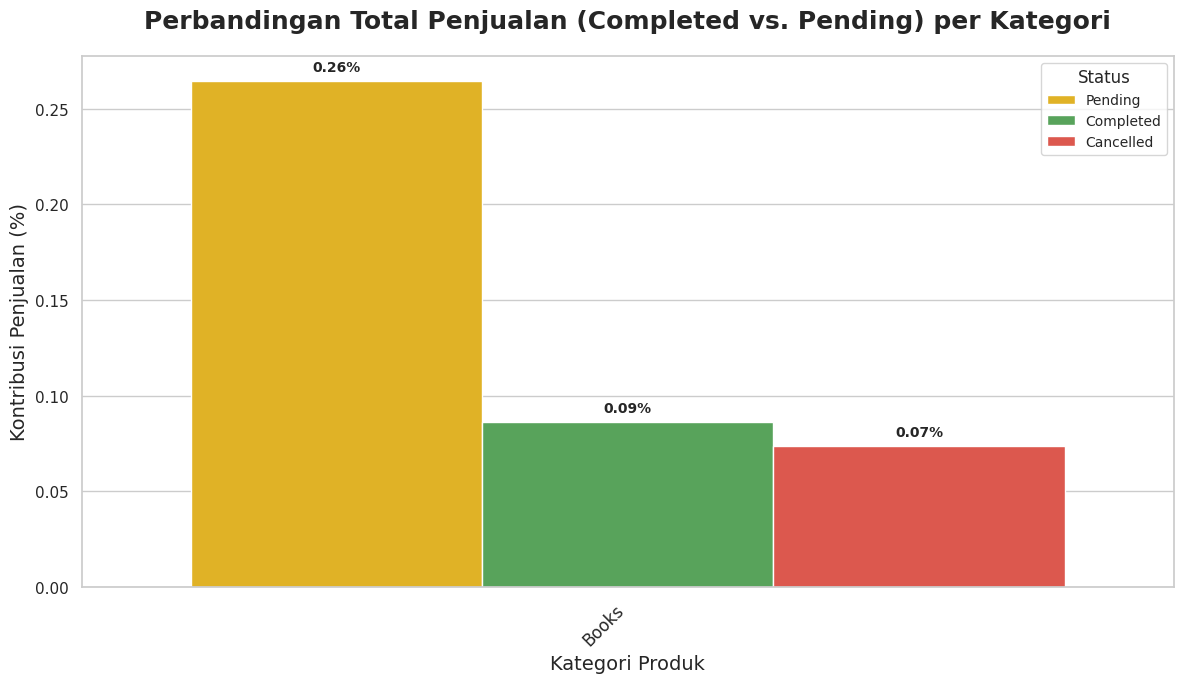

In [ ]:
# --- 2. Sintaks Plotting Grouped Bar Chart ---

# Pengaturan gaya Seaborn
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

# Membuat Diagram Batang Berkelompok
ax = sns.barplot(
    data=books_sales,
    x='Category',
    y='Sales_Contribution_%', # Changed y-axis to Sales_Contribution_%
    hue='Status',
    # Menggunakan palet warna yang membedakan Completed (Hijau) dan Pending (Kuning/Oranye)
    palette={'Completed': '#4CAF50', 'Pending': '#FFC107', 'Cancelled': '#F44336'},
    # order=category_order # Removed undefined variable
)

# 3. Pengaturan Judul dan Label
plt.title(
    'Perbandingan Total Penjualan (Completed vs. Pending) per Kategori',
    fontsize=18,
    fontweight='bold',
    pad=20
)
plt.xlabel('Kategori Produk', fontsize=14)
plt.ylabel('Kontribusi Penjualan (%)', fontsize=14) # Changed y-axis label

# Rotasi label X
plt.xticks(rotation=45, ha='right', fontsize=12)

# 4. Menambahkan Nilai Data (Labels)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f'{height:,.2f}%', # Format with 2 decimal places and percentage
            (p.get_x() + p.get_width() / 2., height),
            ha='center',
            va='center',
            xytext=(0, 10),
            textcoords='offset points',
            fontsize=10,
            fontweight='bold'
        )

# 5. Legenda
ax.legend(title='Status', loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()